
# Bank Note Analysis


Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:

    1. variance of Wavelet Transformed image (continuous)
    2. skewness of Wavelet Transformed image (continuous)
    3. curtosis of Wavelet Transformed image (continuous)
    4. entropy of image (continuous)
    5. class (integer)

Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication


Can we classify banknote as fake or genuine?


In [ ]:
from pyforest import*

In [3]:
lazy_imports()

['import numpy as np',
 'import pickle',
 'import xgboost as xgb',
 'import matplotlib as mpl',
 'import pydot',
 'import keras',
 'import os',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import datetime as dt',
 'import matplotlib.pyplot as plt',
 'import plotly.graph_objs as go',
 'from sklearn.preprocessing import OneHotEncoder',
 'import seaborn as sns',
 'from sklearn.model_selection import train_test_split',
 'from pathlib import Path',
 'from sklearn.manifold import TSNE',
 'import plotly as py',
 'import lightgbm as lgb',
 'import bokeh',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.ensemble import RandomForestClassifier',
 'import plotly.express as px',
 'import statistics',
 'import re',
 'import sklearn',
 'from sklearn.ensemble import RandomForestRegressor',
 'from pyspark import SparkContext',
 'import tensorflow as tf',
 'import tqdm',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import pandas as pd',
 'i

In [4]:
df=pd.read_csv("BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [10]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [12]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

<br>

**Visualization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

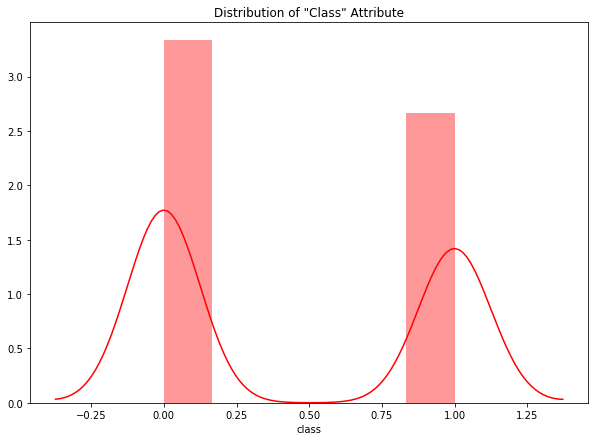

In [14]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')
sns.distplot(df['class'],color='red')

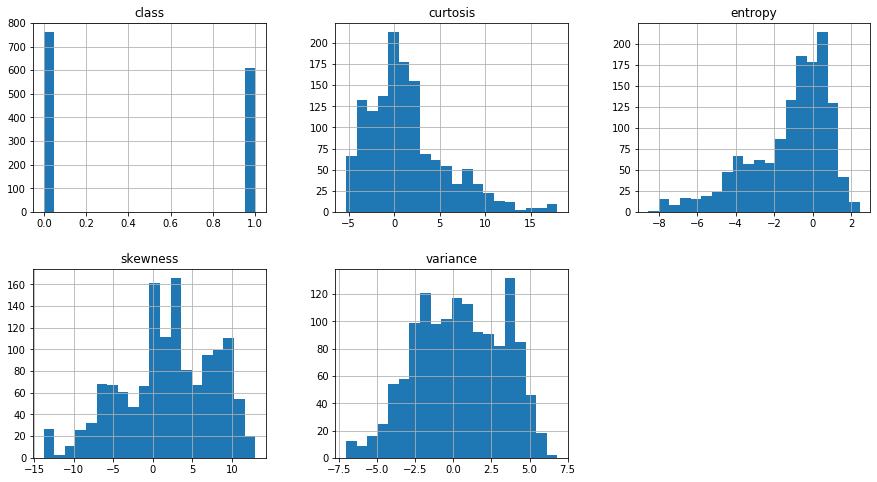

In [18]:
df.hist(bins=20,figsize=(15,8),layout=(2,3));

In [19]:
import warnings

warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

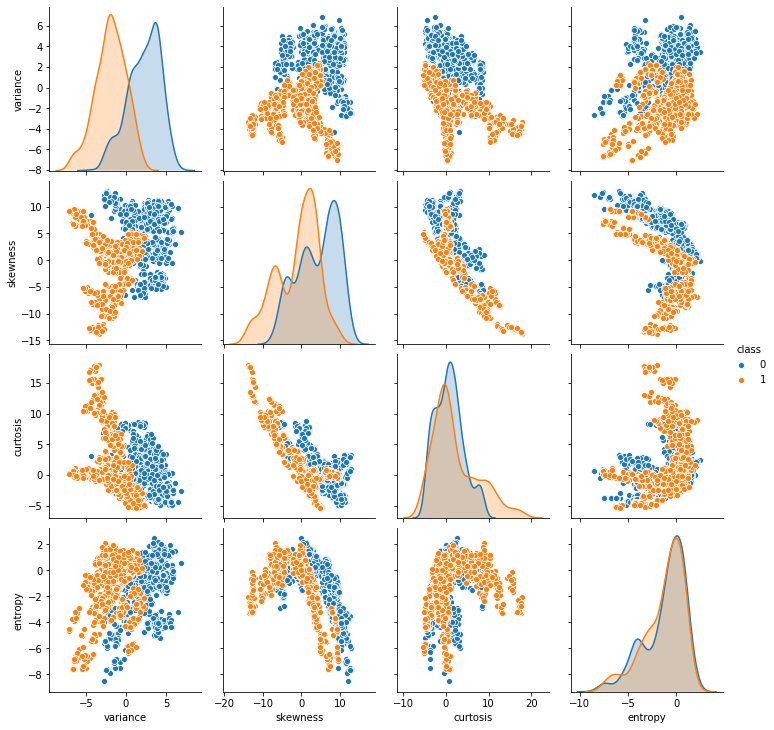

In [20]:
sns.pairplot(df,hue='class')

# Preparing Our Data to Build our Model

In [21]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [22]:
X = df.drop('class',axis=1)
y = df['class']

In [23]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)

<IPython.core.display.Javascript object>

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [28]:
X_test

array([[-1.40564511, -0.03629527, -0.25946279, -0.55356298],
       [ 0.27456924,  0.39719812,  0.19050204,  0.69982149],
       [-1.56677623, -1.70567084,  2.36049857, -0.08188265],
       ...,
       [ 0.33303672,  0.90277959, -0.894603  ,  0.10774845],
       [ 0.24291663, -0.00314587, -0.98169159,  0.65423293],
       [ 0.44734548,  0.89770987, -0.5083209 , -0.56573811]])

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [38]:
classifier = LogisticRegression(solver='liblinear',random_state=1)

classifier.fit(X_train,y_train)

accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)

In [39]:
print("Accuracies:\n",accuracies)

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [40]:
print("Mean Accuracy:",accuracies.mean())

Mean Accuracy: 0.9835863219349459


In [44]:
classifier_pred=classifier.predict(X_test)

In [45]:
classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

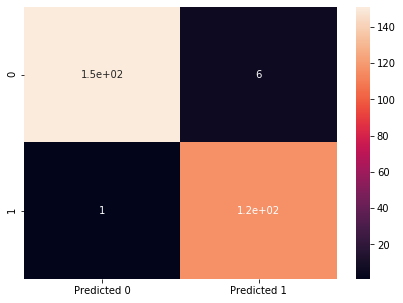

In [89]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, classifier_pred, labels= [0,1])

df.cm = pd.DataFrame(cm,index=[i for  i in [0,1]], columns = [i for  i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df.cm,annot=True)

# Support Vector Machine

In [56]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

svm_accuracies = cross_val_score(estimator = svm_classifier, X=X_train, y=y_train, cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [57]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [58]:
svm_classifier_pred=svm_classifier.predict(X_test)

In [59]:
svm_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

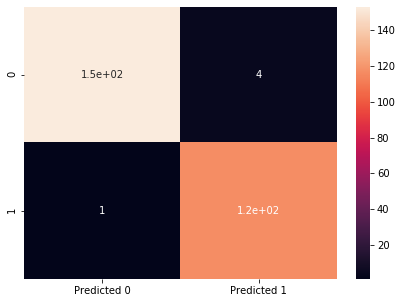

In [60]:
svm_cm = metrics.confusion_matrix(y_test, svm_classifier_pred, labels= [0,1])

df.svm_cm = pd.DataFrame(svm_cm,index=[i for  i in [0,1]], columns = [i for  i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df.svm_cm,annot=True)

In [62]:
svm_classifier_rbf = SVC(kernel='rbf')

svm_classifier_rbf.fit(X_train, y_train)

svm_accuracies_rbf = cross_val_score(estimator = svm_classifier_rbf, X=X_train, y=y_train, cv=10)
print("Accuracies:\n",svm_accuracies_rbf)

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [63]:
rbf_classifier_pred=svm_classifier_rbf.predict(X_test)
rbf_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

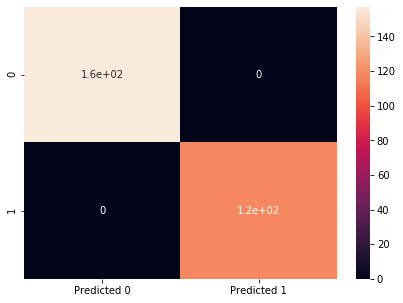

In [65]:
svm_cm_rbf = metrics.confusion_matrix(y_test, rbf_classifier_pred, labels= [0,1])

df.svm_cm_rbf = pd.DataFrame(svm_cm_rbf,index=[i for  i in [0,1]], columns = [i for  i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df.svm_cm_rbf,annot=True)

## RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc_classifier = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rfc_classifier.fit(X_train,y_train)

rfc_accuracies = cross_val_score(estimator = rfc_classifier, X=X_train, y=y_train, cv=10)
print("Accuracies:\n",rfc_accuracies)

Accuracies:
 [0.98181818 1.         0.99090909 0.99090909 1.         0.99090909
 1.         1.         1.         1.        ]


In [72]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9954545454545455


In [78]:
rfc_classifier_pred=rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

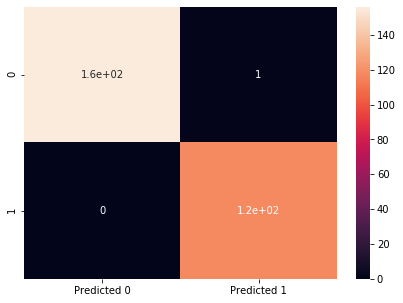

In [79]:
rfc = metrics.confusion_matrix(y_test, rfc_classifier_pred, labels= [0,1])

df_rfc = pd.DataFrame(rfc,index=[i for  i in [0,1]], columns = [i for  i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_rfc,annot=True)

## KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11], 'n_neighbors': [2,5,7,9,11], 'p':[1,2]}

grid =GridSearchCV(KNeighborsClassifier(),param_grid)

grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [84]:
KNN = KNeighborsClassifier(n_neighbors=2, p= 1, leaf_size=2 )

In [85]:
#call KNeighbors algorithm

KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [86]:
KNN_pred=KNN.predict(X_test)

In [87]:
KNN_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

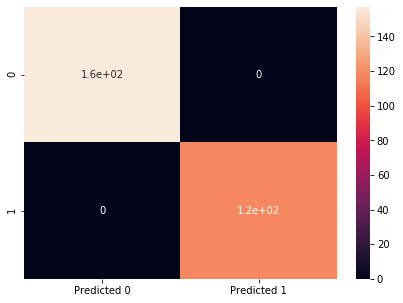

In [90]:
knn = metrics.confusion_matrix(y_test, KNN_pred, labels= [0,1])

df_knn = pd.DataFrame(knn,index=[i for  i in [0,1]], columns = [i for  i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_knn,annot=True)

In [91]:
KNN_accuracies = cross_val_score(estimator = KNN, X=X_train, y=y_train, cv=10)
print("Accuracies:\n",KNN_accuracies)

print("Mean Accuracy:",KNN_accuracies.mean())

Accuracies:
 [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9972727272727273


# Multilayer Perception

In [94]:
from sklearn.neural_network import MLPClassifier

multi_classifier = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, 
alpha=0.0001,solver='sgd',verbose=10,random_state=21, tol=0.000000001)

multi_classifier.fit(X_train,y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

Iteration 254, loss = 0.04285108
Iteration 255, loss = 0.04265372
Iteration 256, loss = 0.04245935
Iteration 257, loss = 0.04226632
Iteration 258, loss = 0.04207579
Iteration 259, loss = 0.04188603
Iteration 260, loss = 0.04169793
Iteration 261, loss = 0.04151085
Iteration 262, loss = 0.04133371
Iteration 263, loss = 0.04114986
Iteration 264, loss = 0.04096914
Iteration 265, loss = 0.04078835
Iteration 266, loss = 0.04061609
Iteration 267, loss = 0.04044067
Iteration 268, loss = 0.04026434
Iteration 269, loss = 0.04009450
Iteration 270, loss = 0.03992535
Iteration 271, loss = 0.03976054
Iteration 272, loss = 0.03959222
Iteration 273, loss = 0.03942884
Iteration 274, loss = 0.03926568
Iteration 275, loss = 0.03910304
Iteration 276, loss = 0.03893744
Iteration 277, loss = 0.03878404
Iteration 278, loss = 0.03861920
Iteration 279, loss = 0.03846199
Iteration 280, loss = 0.03830598
Iteration 281, loss = 0.03815187
Iteration 282, loss = 0.03800226
Iteration 283, loss = 0.03785460
Iteration 

Iteration 515, loss = 0.02034252
Iteration 516, loss = 0.02030666
Iteration 517, loss = 0.02026330
Iteration 518, loss = 0.02022178
Iteration 519, loss = 0.02018039
Iteration 520, loss = 0.02014305
Iteration 521, loss = 0.02010340
Iteration 522, loss = 0.02006458
Iteration 523, loss = 0.02002217
Iteration 524, loss = 0.01998025
Iteration 525, loss = 0.01994146
Iteration 526, loss = 0.01990187
Iteration 527, loss = 0.01986395
Iteration 528, loss = 0.01982180
Iteration 529, loss = 0.01978371
Iteration 530, loss = 0.01974482
Iteration 531, loss = 0.01970654
Iteration 532, loss = 0.01966994
Iteration 533, loss = 0.01962822
Iteration 534, loss = 0.01959167
Iteration 535, loss = 0.01955600
Iteration 536, loss = 0.01951895
Iteration 537, loss = 0.01947656
Iteration 538, loss = 0.01943905
Iteration 539, loss = 0.01940010
Iteration 540, loss = 0.01936248
Iteration 541, loss = 0.01932282
Iteration 542, loss = 0.01928521
Iteration 543, loss = 0.01924830
Iteration 544, loss = 0.01921152
Iteration 

Iteration 765, loss = 0.01313402
Iteration 766, loss = 0.01311253
Iteration 767, loss = 0.01309444
Iteration 768, loss = 0.01307296
Iteration 769, loss = 0.01305290
Iteration 770, loss = 0.01303363
Iteration 771, loss = 0.01301368
Iteration 772, loss = 0.01299605
Iteration 773, loss = 0.01297456
Iteration 774, loss = 0.01295658
Iteration 775, loss = 0.01293456
Iteration 776, loss = 0.01291551
Iteration 777, loss = 0.01289509
Iteration 778, loss = 0.01287550
Iteration 779, loss = 0.01285695
Iteration 780, loss = 0.01283688
Iteration 781, loss = 0.01281723
Iteration 782, loss = 0.01279683
Iteration 783, loss = 0.01277941
Iteration 784, loss = 0.01275880
Iteration 785, loss = 0.01273747
Iteration 786, loss = 0.01271964
Iteration 787, loss = 0.01269907
Iteration 788, loss = 0.01267944
Iteration 789, loss = 0.01266000
Iteration 790, loss = 0.01264274
Iteration 791, loss = 0.01262378
Iteration 792, loss = 0.01260185
Iteration 793, loss = 0.01258401
Iteration 794, loss = 0.01256597
Iteration 

Iteration 1021, loss = 0.00916159
Iteration 1022, loss = 0.00914870
Iteration 1023, loss = 0.00913813
Iteration 1024, loss = 0.00912483
Iteration 1025, loss = 0.00911369
Iteration 1026, loss = 0.00910150
Iteration 1027, loss = 0.00909101
Iteration 1028, loss = 0.00907898
Iteration 1029, loss = 0.00906788
Iteration 1030, loss = 0.00905671
Iteration 1031, loss = 0.00904542
Iteration 1032, loss = 0.00903270
Iteration 1033, loss = 0.00902153
Iteration 1034, loss = 0.00901042
Iteration 1035, loss = 0.00899831
Iteration 1036, loss = 0.00898697
Iteration 1037, loss = 0.00897446
Iteration 1038, loss = 0.00896410
Iteration 1039, loss = 0.00895298
Iteration 1040, loss = 0.00893981
Iteration 1041, loss = 0.00892919
Iteration 1042, loss = 0.00891751
Iteration 1043, loss = 0.00890515
Iteration 1044, loss = 0.00889374
Iteration 1045, loss = 0.00888264
Iteration 1046, loss = 0.00887118
Iteration 1047, loss = 0.00885946
Iteration 1048, loss = 0.00884788
Iteration 1049, loss = 0.00883802
Iteration 1050

Iteration 1272, loss = 0.00679341
Iteration 1273, loss = 0.00678622
Iteration 1274, loss = 0.00677854
Iteration 1275, loss = 0.00677357
Iteration 1276, loss = 0.00676377
Iteration 1277, loss = 0.00675591
Iteration 1278, loss = 0.00674906
Iteration 1279, loss = 0.00674204
Iteration 1280, loss = 0.00673405
Iteration 1281, loss = 0.00672649
Iteration 1282, loss = 0.00672045
Iteration 1283, loss = 0.00671206
Iteration 1284, loss = 0.00670529
Iteration 1285, loss = 0.00669845
Iteration 1286, loss = 0.00669099
Iteration 1287, loss = 0.00668342
Iteration 1288, loss = 0.00667742
Iteration 1289, loss = 0.00667044
Iteration 1290, loss = 0.00666239
Iteration 1291, loss = 0.00665489
Iteration 1292, loss = 0.00664811
Iteration 1293, loss = 0.00664004
Iteration 1294, loss = 0.00663309
Iteration 1295, loss = 0.00662696
Iteration 1296, loss = 0.00661874
Iteration 1297, loss = 0.00661343
Iteration 1298, loss = 0.00660475
Iteration 1299, loss = 0.00659870
Iteration 1300, loss = 0.00659054
Iteration 1301

Iteration 1526, loss = 0.00527508
Iteration 1527, loss = 0.00527055
Iteration 1528, loss = 0.00526663
Iteration 1529, loss = 0.00526143
Iteration 1530, loss = 0.00525602
Iteration 1531, loss = 0.00525163
Iteration 1532, loss = 0.00524760
Iteration 1533, loss = 0.00524223
Iteration 1534, loss = 0.00523713
Iteration 1535, loss = 0.00523264
Iteration 1536, loss = 0.00522786
Iteration 1537, loss = 0.00522296
Iteration 1538, loss = 0.00521873
Iteration 1539, loss = 0.00521357
Iteration 1540, loss = 0.00520894
Iteration 1541, loss = 0.00520427
Iteration 1542, loss = 0.00519972
Iteration 1543, loss = 0.00519523
Iteration 1544, loss = 0.00519008
Iteration 1545, loss = 0.00518531
Iteration 1546, loss = 0.00518086
Iteration 1547, loss = 0.00517589
Iteration 1548, loss = 0.00517123
Iteration 1549, loss = 0.00516697
Iteration 1550, loss = 0.00516257
Iteration 1551, loss = 0.00515795
Iteration 1552, loss = 0.00515303
Iteration 1553, loss = 0.00514894
Iteration 1554, loss = 0.00514408
Iteration 1555

Iteration 1779, loss = 0.00426678
Iteration 1780, loss = 0.00426361
Iteration 1781, loss = 0.00426022
Iteration 1782, loss = 0.00425691
Iteration 1783, loss = 0.00425367
Iteration 1784, loss = 0.00425025
Iteration 1785, loss = 0.00424691
Iteration 1786, loss = 0.00424346
Iteration 1787, loss = 0.00424029
Iteration 1788, loss = 0.00423694
Iteration 1789, loss = 0.00423368
Iteration 1790, loss = 0.00423014
Iteration 1791, loss = 0.00422666
Iteration 1792, loss = 0.00422322
Iteration 1793, loss = 0.00422008
Iteration 1794, loss = 0.00421672
Iteration 1795, loss = 0.00421357
Iteration 1796, loss = 0.00421057
Iteration 1797, loss = 0.00420703
Iteration 1798, loss = 0.00420352
Iteration 1799, loss = 0.00420048
Iteration 1800, loss = 0.00419769
Iteration 1801, loss = 0.00419472
Iteration 1802, loss = 0.00419086
Iteration 1803, loss = 0.00418766
Iteration 1804, loss = 0.00418484
Iteration 1805, loss = 0.00418160
Iteration 1806, loss = 0.00417858
Iteration 1807, loss = 0.00417503
Iteration 1808

Iteration 2026, loss = 0.00356838
Iteration 2027, loss = 0.00356551
Iteration 2028, loss = 0.00356326
Iteration 2029, loss = 0.00356056
Iteration 2030, loss = 0.00355859
Iteration 2031, loss = 0.00355578
Iteration 2032, loss = 0.00355354
Iteration 2033, loss = 0.00355117
Iteration 2034, loss = 0.00354869
Iteration 2035, loss = 0.00354676
Iteration 2036, loss = 0.00354408
Iteration 2037, loss = 0.00354252
Iteration 2038, loss = 0.00353919
Iteration 2039, loss = 0.00353677
Iteration 2040, loss = 0.00353486
Iteration 2041, loss = 0.00353250
Iteration 2042, loss = 0.00352992
Iteration 2043, loss = 0.00352766
Iteration 2044, loss = 0.00352540
Iteration 2045, loss = 0.00352281
Iteration 2046, loss = 0.00352024
Iteration 2047, loss = 0.00351782
Iteration 2048, loss = 0.00351554
Iteration 2049, loss = 0.00351303
Iteration 2050, loss = 0.00351072
Iteration 2051, loss = 0.00350852
Iteration 2052, loss = 0.00350584
Iteration 2053, loss = 0.00350381
Iteration 2054, loss = 0.00350133
Iteration 2055

Iteration 2275, loss = 0.00304080
Iteration 2276, loss = 0.00303920
Iteration 2277, loss = 0.00303703
Iteration 2278, loss = 0.00303535
Iteration 2279, loss = 0.00303361
Iteration 2280, loss = 0.00303176
Iteration 2281, loss = 0.00302981
Iteration 2282, loss = 0.00302804
Iteration 2283, loss = 0.00302598
Iteration 2284, loss = 0.00302441
Iteration 2285, loss = 0.00302249
Iteration 2286, loss = 0.00302063
Iteration 2287, loss = 0.00301901
Iteration 2288, loss = 0.00301726
Iteration 2289, loss = 0.00301520
Iteration 2290, loss = 0.00301332
Iteration 2291, loss = 0.00301191
Iteration 2292, loss = 0.00300974
Iteration 2293, loss = 0.00300801
Iteration 2294, loss = 0.00300633
Iteration 2295, loss = 0.00300455
Iteration 2296, loss = 0.00300263
Iteration 2297, loss = 0.00300098
Iteration 2298, loss = 0.00299920
Iteration 2299, loss = 0.00299725
Iteration 2300, loss = 0.00299561
Iteration 2301, loss = 0.00299394
Iteration 2302, loss = 0.00299187
Iteration 2303, loss = 0.00299059
Iteration 2304

Iteration 2516, loss = 0.00265563
Iteration 2517, loss = 0.00265373
Iteration 2518, loss = 0.00265242
Iteration 2519, loss = 0.00265094
Iteration 2520, loss = 0.00264980
Iteration 2521, loss = 0.00264851
Iteration 2522, loss = 0.00264687
Iteration 2523, loss = 0.00264575
Iteration 2524, loss = 0.00264412
Iteration 2525, loss = 0.00264315
Iteration 2526, loss = 0.00264128
Iteration 2527, loss = 0.00263997
Iteration 2528, loss = 0.00263881
Iteration 2529, loss = 0.00263726
Iteration 2530, loss = 0.00263604
Iteration 2531, loss = 0.00263475
Iteration 2532, loss = 0.00263333
Iteration 2533, loss = 0.00263201
Iteration 2534, loss = 0.00263043
Iteration 2535, loss = 0.00262912
Iteration 2536, loss = 0.00262777
Iteration 2537, loss = 0.00262626
Iteration 2538, loss = 0.00262513
Iteration 2539, loss = 0.00262354
Iteration 2540, loss = 0.00262204
Iteration 2541, loss = 0.00262077
Iteration 2542, loss = 0.00261949
Iteration 2543, loss = 0.00261788
Iteration 2544, loss = 0.00261678
Iteration 2545

Iteration 2758, loss = 0.00235318
Iteration 2759, loss = 0.00235256
Iteration 2760, loss = 0.00235109
Iteration 2761, loss = 0.00234987
Iteration 2762, loss = 0.00234905
Iteration 2763, loss = 0.00234774
Iteration 2764, loss = 0.00234657
Iteration 2765, loss = 0.00234553
Iteration 2766, loss = 0.00234461
Iteration 2767, loss = 0.00234330
Iteration 2768, loss = 0.00234205
Iteration 2769, loss = 0.00234105
Iteration 2770, loss = 0.00233988
Iteration 2771, loss = 0.00233879
Iteration 2772, loss = 0.00233770
Iteration 2773, loss = 0.00233659
Iteration 2774, loss = 0.00233552
Iteration 2775, loss = 0.00233434
Iteration 2776, loss = 0.00233320
Iteration 2777, loss = 0.00233206
Iteration 2778, loss = 0.00233093
Iteration 2779, loss = 0.00233006
Iteration 2780, loss = 0.00232889
Iteration 2781, loss = 0.00232770
Iteration 2782, loss = 0.00232672
Iteration 2783, loss = 0.00232543
Iteration 2784, loss = 0.00232434
Iteration 2785, loss = 0.00232320
Iteration 2786, loss = 0.00232215
Iteration 2787

Iteration 3007, loss = 0.00209866
Iteration 3008, loss = 0.00209775
Iteration 3009, loss = 0.00209693
Iteration 3010, loss = 0.00209610
Iteration 3011, loss = 0.00209507
Iteration 3012, loss = 0.00209421
Iteration 3013, loss = 0.00209323
Iteration 3014, loss = 0.00209230
Iteration 3015, loss = 0.00209141
Iteration 3016, loss = 0.00209054
Iteration 3017, loss = 0.00208984
Iteration 3018, loss = 0.00208863
Iteration 3019, loss = 0.00208777
Iteration 3020, loss = 0.00208675
Iteration 3021, loss = 0.00208586
Iteration 3022, loss = 0.00208514
Iteration 3023, loss = 0.00208415
Iteration 3024, loss = 0.00208311
Iteration 3025, loss = 0.00208239
Iteration 3026, loss = 0.00208135
Iteration 3027, loss = 0.00208042
Iteration 3028, loss = 0.00207952
Iteration 3029, loss = 0.00207862
Iteration 3030, loss = 0.00207755
Iteration 3031, loss = 0.00207675
Iteration 3032, loss = 0.00207590
Iteration 3033, loss = 0.00207496
Iteration 3034, loss = 0.00207425
Iteration 3035, loss = 0.00207298
Iteration 3036

Iteration 3252, loss = 0.00189261
Iteration 3253, loss = 0.00189167
Iteration 3254, loss = 0.00189099
Iteration 3255, loss = 0.00189007
Iteration 3256, loss = 0.00188936
Iteration 3257, loss = 0.00188863
Iteration 3258, loss = 0.00188797
Iteration 3259, loss = 0.00188704
Iteration 3260, loss = 0.00188636
Iteration 3261, loss = 0.00188562
Iteration 3262, loss = 0.00188497
Iteration 3263, loss = 0.00188398
Iteration 3264, loss = 0.00188327
Iteration 3265, loss = 0.00188242
Iteration 3266, loss = 0.00188166
Iteration 3267, loss = 0.00188094
Iteration 3268, loss = 0.00188032
Iteration 3269, loss = 0.00187959
Iteration 3270, loss = 0.00187892
Iteration 3271, loss = 0.00187799
Iteration 3272, loss = 0.00187717
Iteration 3273, loss = 0.00187657
Iteration 3274, loss = 0.00187580
Iteration 3275, loss = 0.00187501
Iteration 3276, loss = 0.00187419
Iteration 3277, loss = 0.00187361
Iteration 3278, loss = 0.00187279
Iteration 3279, loss = 0.00187198
Iteration 3280, loss = 0.00187121
Iteration 3281

Iteration 3501, loss = 0.00171734
Iteration 3502, loss = 0.00171668
Iteration 3503, loss = 0.00171616
Iteration 3504, loss = 0.00171540
Iteration 3505, loss = 0.00171478
Iteration 3506, loss = 0.00171413
Iteration 3507, loss = 0.00171351
Iteration 3508, loss = 0.00171282
Iteration 3509, loss = 0.00171222
Iteration 3510, loss = 0.00171158
Iteration 3511, loss = 0.00171087
Iteration 3512, loss = 0.00171040
Iteration 3513, loss = 0.00170968
Iteration 3514, loss = 0.00170904
Iteration 3515, loss = 0.00170840
Iteration 3516, loss = 0.00170776
Iteration 3517, loss = 0.00170720
Iteration 3518, loss = 0.00170652
Iteration 3519, loss = 0.00170601
Iteration 3520, loss = 0.00170519
Iteration 3521, loss = 0.00170469
Iteration 3522, loss = 0.00170404
Iteration 3523, loss = 0.00170354
Iteration 3524, loss = 0.00170271
Iteration 3525, loss = 0.00170215
Iteration 3526, loss = 0.00170156
Iteration 3527, loss = 0.00170101
Iteration 3528, loss = 0.00170025
Iteration 3529, loss = 0.00169964
Iteration 3530

Iteration 3743, loss = 0.00157317
Iteration 3744, loss = 0.00157265
Iteration 3745, loss = 0.00157203
Iteration 3746, loss = 0.00157155
Iteration 3747, loss = 0.00157103
Iteration 3748, loss = 0.00157058
Iteration 3749, loss = 0.00156988
Iteration 3750, loss = 0.00156940
Iteration 3751, loss = 0.00156882
Iteration 3752, loss = 0.00156825
Iteration 3753, loss = 0.00156774
Iteration 3754, loss = 0.00156724
Iteration 3755, loss = 0.00156668
Iteration 3756, loss = 0.00156620
Iteration 3757, loss = 0.00156563
Iteration 3758, loss = 0.00156508
Iteration 3759, loss = 0.00156440
Iteration 3760, loss = 0.00156393
Iteration 3761, loss = 0.00156338
Iteration 3762, loss = 0.00156283
Iteration 3763, loss = 0.00156230
Iteration 3764, loss = 0.00156173
Iteration 3765, loss = 0.00156125
Iteration 3766, loss = 0.00156071
Iteration 3767, loss = 0.00156020
Iteration 3768, loss = 0.00155966
Iteration 3769, loss = 0.00155910
Iteration 3770, loss = 0.00155854
Iteration 3771, loss = 0.00155804
Iteration 3772

Iteration 3993, loss = 0.00144541
Iteration 3994, loss = 0.00144495
Iteration 3995, loss = 0.00144447
Iteration 3996, loss = 0.00144402
Iteration 3997, loss = 0.00144354
Iteration 3998, loss = 0.00144307
Iteration 3999, loss = 0.00144256
Iteration 4000, loss = 0.00144211
Iteration 4001, loss = 0.00144174
Iteration 4002, loss = 0.00144114
Iteration 4003, loss = 0.00144068
Iteration 4004, loss = 0.00144017
Iteration 4005, loss = 0.00143971
Iteration 4006, loss = 0.00143925
Iteration 4007, loss = 0.00143882
Iteration 4008, loss = 0.00143829
Iteration 4009, loss = 0.00143779
Iteration 4010, loss = 0.00143738
Iteration 4011, loss = 0.00143690
Iteration 4012, loss = 0.00143650
Iteration 4013, loss = 0.00143597
Iteration 4014, loss = 0.00143553
Iteration 4015, loss = 0.00143506
Iteration 4016, loss = 0.00143465
Iteration 4017, loss = 0.00143414
Iteration 4018, loss = 0.00143365
Iteration 4019, loss = 0.00143312
Iteration 4020, loss = 0.00143269
Iteration 4021, loss = 0.00143226
Iteration 4022

Iteration 4235, loss = 0.00133822
Iteration 4236, loss = 0.00133775
Iteration 4237, loss = 0.00133740
Iteration 4238, loss = 0.00133692
Iteration 4239, loss = 0.00133652
Iteration 4240, loss = 0.00133608
Iteration 4241, loss = 0.00133572
Iteration 4242, loss = 0.00133551
Iteration 4243, loss = 0.00133490
Iteration 4244, loss = 0.00133449
Iteration 4245, loss = 0.00133415
Iteration 4246, loss = 0.00133368
Iteration 4247, loss = 0.00133335
Iteration 4248, loss = 0.00133290
Iteration 4249, loss = 0.00133248
Iteration 4250, loss = 0.00133213
Iteration 4251, loss = 0.00133168
Iteration 4252, loss = 0.00133129
Iteration 4253, loss = 0.00133087
Iteration 4254, loss = 0.00133045
Iteration 4255, loss = 0.00133004
Iteration 4256, loss = 0.00132969
Iteration 4257, loss = 0.00132923
Iteration 4258, loss = 0.00132884
Iteration 4259, loss = 0.00132847
Iteration 4260, loss = 0.00132797
Iteration 4261, loss = 0.00132767
Iteration 4262, loss = 0.00132721
Iteration 4263, loss = 0.00132677
Iteration 4264

Iteration 4479, loss = 0.00124342
Iteration 4480, loss = 0.00124302
Iteration 4481, loss = 0.00124265
Iteration 4482, loss = 0.00124229
Iteration 4483, loss = 0.00124201
Iteration 4484, loss = 0.00124156
Iteration 4485, loss = 0.00124121
Iteration 4486, loss = 0.00124085
Iteration 4487, loss = 0.00124051
Iteration 4488, loss = 0.00124017
Iteration 4489, loss = 0.00123980
Iteration 4490, loss = 0.00123942
Iteration 4491, loss = 0.00123911
Iteration 4492, loss = 0.00123874
Iteration 4493, loss = 0.00123831
Iteration 4494, loss = 0.00123797
Iteration 4495, loss = 0.00123757
Iteration 4496, loss = 0.00123721
Iteration 4497, loss = 0.00123689
Iteration 4498, loss = 0.00123651
Iteration 4499, loss = 0.00123615
Iteration 4500, loss = 0.00123580
Iteration 4501, loss = 0.00123551
Iteration 4502, loss = 0.00123508
Iteration 4503, loss = 0.00123471
Iteration 4504, loss = 0.00123435
Iteration 4505, loss = 0.00123402
Iteration 4506, loss = 0.00123365
Iteration 4507, loss = 0.00123326
Iteration 4508

Iteration 4721, loss = 0.00116085
Iteration 4722, loss = 0.00116044
Iteration 4723, loss = 0.00116019
Iteration 4724, loss = 0.00115981
Iteration 4725, loss = 0.00115948
Iteration 4726, loss = 0.00115921
Iteration 4727, loss = 0.00115882
Iteration 4728, loss = 0.00115849
Iteration 4729, loss = 0.00115822
Iteration 4730, loss = 0.00115786
Iteration 4731, loss = 0.00115760
Iteration 4732, loss = 0.00115723
Iteration 4733, loss = 0.00115693
Iteration 4734, loss = 0.00115663
Iteration 4735, loss = 0.00115642
Iteration 4736, loss = 0.00115595
Iteration 4737, loss = 0.00115566
Iteration 4738, loss = 0.00115537
Iteration 4739, loss = 0.00115506
Iteration 4740, loss = 0.00115476
Iteration 4741, loss = 0.00115441
Iteration 4742, loss = 0.00115412
Iteration 4743, loss = 0.00115381
Iteration 4744, loss = 0.00115350
Iteration 4745, loss = 0.00115314
Iteration 4746, loss = 0.00115283
Iteration 4747, loss = 0.00115259
Iteration 4748, loss = 0.00115223
Iteration 4749, loss = 0.00115188
Iteration 4750

Iteration 4974, loss = 0.00108399
Iteration 4975, loss = 0.00108373
Iteration 4976, loss = 0.00108341
Iteration 4977, loss = 0.00108315
Iteration 4978, loss = 0.00108288
Iteration 4979, loss = 0.00108259
Iteration 4980, loss = 0.00108228
Iteration 4981, loss = 0.00108202
Iteration 4982, loss = 0.00108172
Iteration 4983, loss = 0.00108148
Iteration 4984, loss = 0.00108114
Iteration 4985, loss = 0.00108095
Iteration 4986, loss = 0.00108058
Iteration 4987, loss = 0.00108032
Iteration 4988, loss = 0.00108003
Iteration 4989, loss = 0.00107973
Iteration 4990, loss = 0.00107952
Iteration 4991, loss = 0.00107917
Iteration 4992, loss = 0.00107889
Iteration 4993, loss = 0.00107863
Iteration 4994, loss = 0.00107832
Iteration 4995, loss = 0.00107803
Iteration 4996, loss = 0.00107778
Iteration 4997, loss = 0.00107749
Iteration 4998, loss = 0.00107721
Iteration 4999, loss = 0.00107695
Iteration 5000, loss = 0.00107666
Iteration 5001, loss = 0.00107639
Iteration 5002, loss = 0.00107609
Iteration 5003

Iteration 5223, loss = 0.00101659
Iteration 5224, loss = 0.00101631
Iteration 5225, loss = 0.00101599
Iteration 5226, loss = 0.00101572
Iteration 5227, loss = 0.00101542
Iteration 5228, loss = 0.00101520
Iteration 5229, loss = 0.00101495
Iteration 5230, loss = 0.00101467
Iteration 5231, loss = 0.00101435
Iteration 5232, loss = 0.00101410
Iteration 5233, loss = 0.00101379
Iteration 5234, loss = 0.00101360
Iteration 5235, loss = 0.00101324
Iteration 5236, loss = 0.00101296
Iteration 5237, loss = 0.00101272
Iteration 5238, loss = 0.00101244
Iteration 5239, loss = 0.00101220
Iteration 5240, loss = 0.00101192
Iteration 5241, loss = 0.00101160
Iteration 5242, loss = 0.00101133
Iteration 5243, loss = 0.00101108
Iteration 5244, loss = 0.00101077
Iteration 5245, loss = 0.00101049
Iteration 5246, loss = 0.00101024
Iteration 5247, loss = 0.00100995
Iteration 5248, loss = 0.00100967
Iteration 5249, loss = 0.00100943
Iteration 5250, loss = 0.00100913
Iteration 5251, loss = 0.00100884
Iteration 5252

Iteration 5474, loss = 0.00095317
Iteration 5475, loss = 0.00095292
Iteration 5476, loss = 0.00095271
Iteration 5477, loss = 0.00095244
Iteration 5478, loss = 0.00095219
Iteration 5479, loss = 0.00095195
Iteration 5480, loss = 0.00095169
Iteration 5481, loss = 0.00095144
Iteration 5482, loss = 0.00095123
Iteration 5483, loss = 0.00095094
Iteration 5484, loss = 0.00095074
Iteration 5485, loss = 0.00095047
Iteration 5486, loss = 0.00095026
Iteration 5487, loss = 0.00095001
Iteration 5488, loss = 0.00094975
Iteration 5489, loss = 0.00094958
Iteration 5490, loss = 0.00094932
Iteration 5491, loss = 0.00094909
Iteration 5492, loss = 0.00094902
Iteration 5493, loss = 0.00094862
Iteration 5494, loss = 0.00094841
Iteration 5495, loss = 0.00094814
Iteration 5496, loss = 0.00094793
Iteration 5497, loss = 0.00094775
Iteration 5498, loss = 0.00094747
Iteration 5499, loss = 0.00094724
Iteration 5500, loss = 0.00094701
Iteration 5501, loss = 0.00094681
Iteration 5502, loss = 0.00094655
Iteration 5503

Iteration 5722, loss = 0.00089777
Iteration 5723, loss = 0.00089758
Iteration 5724, loss = 0.00089739
Iteration 5725, loss = 0.00089718
Iteration 5726, loss = 0.00089695
Iteration 5727, loss = 0.00089675
Iteration 5728, loss = 0.00089653
Iteration 5729, loss = 0.00089634
Iteration 5730, loss = 0.00089610
Iteration 5731, loss = 0.00089594
Iteration 5732, loss = 0.00089574
Iteration 5733, loss = 0.00089546
Iteration 5734, loss = 0.00089534
Iteration 5735, loss = 0.00089509
Iteration 5736, loss = 0.00089487
Iteration 5737, loss = 0.00089470
Iteration 5738, loss = 0.00089443
Iteration 5739, loss = 0.00089425
Iteration 5740, loss = 0.00089404
Iteration 5741, loss = 0.00089380
Iteration 5742, loss = 0.00089359
Iteration 5743, loss = 0.00089342
Iteration 5744, loss = 0.00089319
Iteration 5745, loss = 0.00089301
Iteration 5746, loss = 0.00089276
Iteration 5747, loss = 0.00089255
Iteration 5748, loss = 0.00089232
Iteration 5749, loss = 0.00089216
Iteration 5750, loss = 0.00089193
Iteration 5751

Iteration 5971, loss = 0.00084836
Iteration 5972, loss = 0.00084818
Iteration 5973, loss = 0.00084801
Iteration 5974, loss = 0.00084784
Iteration 5975, loss = 0.00084764
Iteration 5976, loss = 0.00084748
Iteration 5977, loss = 0.00084728
Iteration 5978, loss = 0.00084709
Iteration 5979, loss = 0.00084689
Iteration 5980, loss = 0.00084672
Iteration 5981, loss = 0.00084655
Iteration 5982, loss = 0.00084633
Iteration 5983, loss = 0.00084625
Iteration 5984, loss = 0.00084597
Iteration 5985, loss = 0.00084581
Iteration 5986, loss = 0.00084559
Iteration 5987, loss = 0.00084547
Iteration 5988, loss = 0.00084526
Iteration 5989, loss = 0.00084507
Iteration 5990, loss = 0.00084487
Iteration 5991, loss = 0.00084468
Iteration 5992, loss = 0.00084453
Iteration 5993, loss = 0.00084433
Iteration 5994, loss = 0.00084413
Iteration 5995, loss = 0.00084398
Iteration 5996, loss = 0.00084373
Iteration 5997, loss = 0.00084357
Iteration 5998, loss = 0.00084337
Iteration 5999, loss = 0.00084321
Iteration 6000

Iteration 6220, loss = 0.00080385
Iteration 6221, loss = 0.00080371
Iteration 6222, loss = 0.00080355
Iteration 6223, loss = 0.00080335
Iteration 6224, loss = 0.00080321
Iteration 6225, loss = 0.00080303
Iteration 6226, loss = 0.00080284
Iteration 6227, loss = 0.00080270
Iteration 6228, loss = 0.00080252
Iteration 6229, loss = 0.00080237
Iteration 6230, loss = 0.00080221
Iteration 6231, loss = 0.00080203
Iteration 6232, loss = 0.00080185
Iteration 6233, loss = 0.00080167
Iteration 6234, loss = 0.00080149
Iteration 6235, loss = 0.00080133
Iteration 6236, loss = 0.00080112
Iteration 6237, loss = 0.00080099
Iteration 6238, loss = 0.00080081
Iteration 6239, loss = 0.00080062
Iteration 6240, loss = 0.00080045
Iteration 6241, loss = 0.00080036
Iteration 6242, loss = 0.00080013
Iteration 6243, loss = 0.00079995
Iteration 6244, loss = 0.00079980
Iteration 6245, loss = 0.00079965
Iteration 6246, loss = 0.00079944
Iteration 6247, loss = 0.00079931
Iteration 6248, loss = 0.00079916
Iteration 6249

Iteration 6463, loss = 0.00076418
Iteration 6464, loss = 0.00076403
Iteration 6465, loss = 0.00076386
Iteration 6466, loss = 0.00076374
Iteration 6467, loss = 0.00076354
Iteration 6468, loss = 0.00076337
Iteration 6469, loss = 0.00076321
Iteration 6470, loss = 0.00076304
Iteration 6471, loss = 0.00076288
Iteration 6472, loss = 0.00076277
Iteration 6473, loss = 0.00076256
Iteration 6474, loss = 0.00076242
Iteration 6475, loss = 0.00076225
Iteration 6476, loss = 0.00076209
Iteration 6477, loss = 0.00076194
Iteration 6478, loss = 0.00076181
Iteration 6479, loss = 0.00076162
Iteration 6480, loss = 0.00076148
Iteration 6481, loss = 0.00076136
Iteration 6482, loss = 0.00076118
Iteration 6483, loss = 0.00076103
Iteration 6484, loss = 0.00076088
Iteration 6485, loss = 0.00076071
Iteration 6486, loss = 0.00076055
Iteration 6487, loss = 0.00076039
Iteration 6488, loss = 0.00076028
Iteration 6489, loss = 0.00076012
Iteration 6490, loss = 0.00075994
Iteration 6491, loss = 0.00075984
Iteration 6492

Iteration 6704, loss = 0.00072792
Iteration 6705, loss = 0.00072780
Iteration 6706, loss = 0.00072766
Iteration 6707, loss = 0.00072753
Iteration 6708, loss = 0.00072737
Iteration 6709, loss = 0.00072726
Iteration 6710, loss = 0.00072710
Iteration 6711, loss = 0.00072696
Iteration 6712, loss = 0.00072682
Iteration 6713, loss = 0.00072667
Iteration 6714, loss = 0.00072656
Iteration 6715, loss = 0.00072639
Iteration 6716, loss = 0.00072627
Iteration 6717, loss = 0.00072611
Iteration 6718, loss = 0.00072597
Iteration 6719, loss = 0.00072582
Iteration 6720, loss = 0.00072569
Iteration 6721, loss = 0.00072558
Iteration 6722, loss = 0.00072542
Iteration 6723, loss = 0.00072528
Iteration 6724, loss = 0.00072515
Iteration 6725, loss = 0.00072500
Iteration 6726, loss = 0.00072484
Iteration 6727, loss = 0.00072472
Iteration 6728, loss = 0.00072457
Iteration 6729, loss = 0.00072445
Iteration 6730, loss = 0.00072428
Iteration 6731, loss = 0.00072414
Iteration 6732, loss = 0.00072398
Iteration 6733

Iteration 6950, loss = 0.00069406
Iteration 6951, loss = 0.00069394
Iteration 6952, loss = 0.00069380
Iteration 6953, loss = 0.00069368
Iteration 6954, loss = 0.00069355
Iteration 6955, loss = 0.00069340
Iteration 6956, loss = 0.00069329
Iteration 6957, loss = 0.00069316
Iteration 6958, loss = 0.00069302
Iteration 6959, loss = 0.00069290
Iteration 6960, loss = 0.00069277
Iteration 6961, loss = 0.00069263
Iteration 6962, loss = 0.00069247
Iteration 6963, loss = 0.00069236
Iteration 6964, loss = 0.00069223
Iteration 6965, loss = 0.00069211
Iteration 6966, loss = 0.00069197
Iteration 6967, loss = 0.00069183
Iteration 6968, loss = 0.00069171
Iteration 6969, loss = 0.00069162
Iteration 6970, loss = 0.00069144
Iteration 6971, loss = 0.00069131
Iteration 6972, loss = 0.00069121
Iteration 6973, loss = 0.00069103
Iteration 6974, loss = 0.00069090
Iteration 6975, loss = 0.00069077
Iteration 6976, loss = 0.00069063
Iteration 6977, loss = 0.00069054
Iteration 6978, loss = 0.00069039
Iteration 6979

Iteration 7198, loss = 0.00066226
Iteration 7199, loss = 0.00066212
Iteration 7200, loss = 0.00066199
Iteration 7201, loss = 0.00066190
Iteration 7202, loss = 0.00066174
Iteration 7203, loss = 0.00066163
Iteration 7204, loss = 0.00066151
Iteration 7205, loss = 0.00066137
Iteration 7206, loss = 0.00066129
Iteration 7207, loss = 0.00066116
Iteration 7208, loss = 0.00066103
Iteration 7209, loss = 0.00066087
Iteration 7210, loss = 0.00066077
Iteration 7211, loss = 0.00066066
Iteration 7212, loss = 0.00066052
Iteration 7213, loss = 0.00066040
Iteration 7214, loss = 0.00066028
Iteration 7215, loss = 0.00066016
Iteration 7216, loss = 0.00066003
Iteration 7217, loss = 0.00065992
Iteration 7218, loss = 0.00065980
Iteration 7219, loss = 0.00065968
Iteration 7220, loss = 0.00065955
Iteration 7221, loss = 0.00065941
Iteration 7222, loss = 0.00065928
Iteration 7223, loss = 0.00065916
Iteration 7224, loss = 0.00065903
Iteration 7225, loss = 0.00065891
Iteration 7226, loss = 0.00065880
Iteration 7227

Iteration 7445, loss = 0.00063322
Iteration 7446, loss = 0.00063309
Iteration 7447, loss = 0.00063297
Iteration 7448, loss = 0.00063285
Iteration 7449, loss = 0.00063280
Iteration 7450, loss = 0.00063262
Iteration 7451, loss = 0.00063255
Iteration 7452, loss = 0.00063241
Iteration 7453, loss = 0.00063228
Iteration 7454, loss = 0.00063218
Iteration 7455, loss = 0.00063206
Iteration 7456, loss = 0.00063198
Iteration 7457, loss = 0.00063185
Iteration 7458, loss = 0.00063175
Iteration 7459, loss = 0.00063162
Iteration 7460, loss = 0.00063153
Iteration 7461, loss = 0.00063142
Iteration 7462, loss = 0.00063128
Iteration 7463, loss = 0.00063119
Iteration 7464, loss = 0.00063106
Iteration 7465, loss = 0.00063094
Iteration 7466, loss = 0.00063084
Iteration 7467, loss = 0.00063075
Iteration 7468, loss = 0.00063061
Iteration 7469, loss = 0.00063052
Iteration 7470, loss = 0.00063042
Iteration 7471, loss = 0.00063030
Iteration 7472, loss = 0.00063016
Iteration 7473, loss = 0.00063007
Iteration 7474

Iteration 7694, loss = 0.00060640
Iteration 7695, loss = 0.00060631
Iteration 7696, loss = 0.00060620
Iteration 7697, loss = 0.00060609
Iteration 7698, loss = 0.00060600
Iteration 7699, loss = 0.00060591
Iteration 7700, loss = 0.00060581
Iteration 7701, loss = 0.00060570
Iteration 7702, loss = 0.00060558
Iteration 7703, loss = 0.00060550
Iteration 7704, loss = 0.00060540
Iteration 7705, loss = 0.00060528
Iteration 7706, loss = 0.00060520
Iteration 7707, loss = 0.00060508
Iteration 7708, loss = 0.00060499
Iteration 7709, loss = 0.00060488
Iteration 7710, loss = 0.00060477
Iteration 7711, loss = 0.00060468
Iteration 7712, loss = 0.00060458
Iteration 7713, loss = 0.00060448
Iteration 7714, loss = 0.00060440
Iteration 7715, loss = 0.00060429
Iteration 7716, loss = 0.00060417
Iteration 7717, loss = 0.00060408
Iteration 7718, loss = 0.00060397
Iteration 7719, loss = 0.00060386
Iteration 7720, loss = 0.00060376
Iteration 7721, loss = 0.00060366
Iteration 7722, loss = 0.00060356
Iteration 7723

Iteration 7946, loss = 0.00058120
Iteration 7947, loss = 0.00058111
Iteration 7948, loss = 0.00058101
Iteration 7949, loss = 0.00058090
Iteration 7950, loss = 0.00058080
Iteration 7951, loss = 0.00058074
Iteration 7952, loss = 0.00058061
Iteration 7953, loss = 0.00058052
Iteration 7954, loss = 0.00058043
Iteration 7955, loss = 0.00058035
Iteration 7956, loss = 0.00058024
Iteration 7957, loss = 0.00058015
Iteration 7958, loss = 0.00058005
Iteration 7959, loss = 0.00058001
Iteration 7960, loss = 0.00057988
Iteration 7961, loss = 0.00057977
Iteration 7962, loss = 0.00057967
Iteration 7963, loss = 0.00057958
Iteration 7964, loss = 0.00057948
Iteration 7965, loss = 0.00057939
Iteration 7966, loss = 0.00057930
Iteration 7967, loss = 0.00057920
Iteration 7968, loss = 0.00057911
Iteration 7969, loss = 0.00057906
Iteration 7970, loss = 0.00057891
Iteration 7971, loss = 0.00057882
Iteration 7972, loss = 0.00057874
Iteration 7973, loss = 0.00057864
Iteration 7974, loss = 0.00057854
Iteration 7975

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=8000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [95]:
multi_pred=multi_classifier.predict(X_test)
multi_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

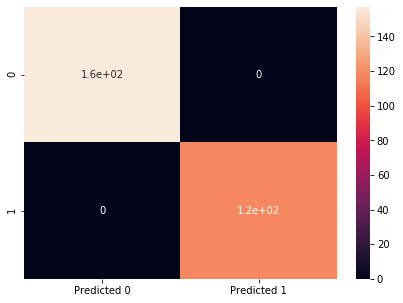

In [96]:
MLP = metrics.confusion_matrix(y_test, multi_pred, labels= [0,1])

df_MLP = pd.DataFrame(MLP,index=[i for  i in [0,1]], columns = [i for  i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_MLP,annot=True)

# Printing each Algorithm and the Accuracy Score

In [99]:
print("Logistic Regression:",accuracies.mean())
print("Support Vector Machine:",svm_accuracies.mean())
print("Support Vector Machine for rbf:",svm_accuracies_rbf.mean())
print("Random Forest Classifier:",rfc_accuracies.mean())
print("KNeighborsClassifier:",KNN_accuracies.mean())
print("MLPClassifier:",accuracy_score(y_test,multi_pred))

Logistic Regression: 0.9835863219349459
Support Vector Machine: 0.9854045037531277
Support Vector Machine for rbf: 1.0
Random Forest Classifier: 0.9954545454545455
KNeighborsClassifier: 0.9972727272727273
MLPClassifier: 1.0



It can be seen that Support Vector Machine (using kernel=rbf) and MLPClassifier: 1.0 are having hightest accuracy score of 100% and RandomForestClassifier is also doing very great with accuracy score of 99%

These can also be verified from the confusion matrix

Accuracy of 100% is quite weired and I suggest you try different approach to verify this such instead of 80:20, try 70:30 splitting and also try tuning the parameters of the different algorithms to verfify you results

logistic regression documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

SVM documentation: https://scikit-learn.org/stable/modules/svm.html

GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
